In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
RESULT_FOLDER_NAME = 'results'
BULK_FOLDER_NAME = 'bulks'
SEEN_BY_FOLDER_NAME = 'seen_bys'

NORMAL_NO_JAM =  "seen_by_normal_result_2024-06-06_00-05-56.txt"
MISINFO_NO_JAM = "seen_by_misinfo_result_2024-06-06_00-05-56.txt"

MISINFO_JAMMED =  "seen_by_normal_result_2024-06-06_00-06-00.txt"
NORMAL_JAMMED = "seen_by_misinfo_result_2024-06-06_00-06-00.txt"
LINE_TO_TEST = 125

In [169]:
def get_to_plot(file_name):
    path = os.path.join(SEEN_BY_FOLDER_NAME, file_name)
    lines1 = []
    with open(path, 'r') as f:
        lines1 = f.readlines()
    arr = np.array(list(map(int,lines1[LINE_TO_TEST].strip().split(','))))
    index_1 = np.nonzero(arr)[0][0]
    reversed_arr = arr[::-1]
    non_zero_indices = np.nonzero(reversed_arr)[0]
    
    if non_zero_indices.size > 0:
        # The last non-zero value in the original array
        last_non_zero_value = reversed_arr[non_zero_indices[0]]
        # The index of the last non-zero value in the original array
        last_non_zero_index = len(arr) - 1 - non_zero_indices[0]
    to_plot = arr[index_1:last_non_zero_index]
    return to_plot
get_to_plot(FILE_TO_TEST)

array([ 1,  2,  7,  6,  4,  7, 15, 16, 16, 19, 23, 23, 20, 23, 27, 33, 35,
       42, 39, 30, 22, 14, 22, 21, 31, 30, 19, 22, 15,  6,  3,  4,  2,  0])

[ 1  1  0  2  1  1  6 13  9 15 16 17 36 43 64 54 60 51 43 60 36 40  7 12
  8  2]
[ 1  0  2  2  8 12 13 18 24 27 26 32 25 29 27 25 34 30 29 35 32 39 28 30
 22 17 17 14]
[ 1  1  0  2  1  1  6 13  9 15 16 17 36 43 64 54 60 51 43 60 36 40  7 12
  8  2  0  0]
[ 1  0  2  2  8 12 13 18 24 27 26 32 25 29 27 25 34 30 29 35 32 39 28 30
 22 17 17 14]


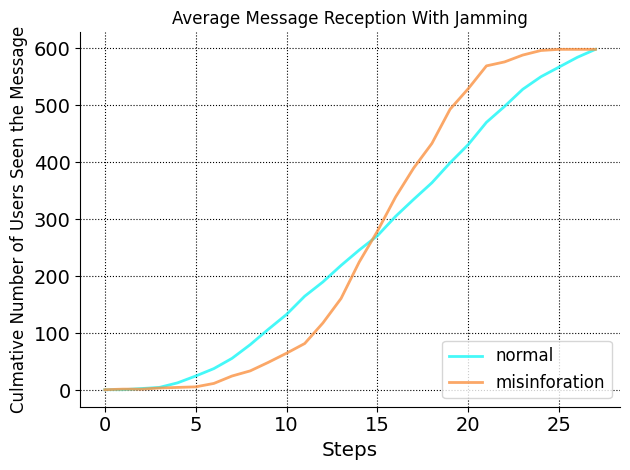

In [170]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# to_plot = get_to_plot(MISINFO_JAMMED)
# to_plot2 = get_to_plot(NORMAL_JAMMED)
to_plot = get_to_plot(MISINFO_NO_JAM)
to_plot2 = get_to_plot(NORMAL_NO_JAM)

x_size = max(len(to_plot), len(to_plot2))

print(to_plot)
print(to_plot2)
if len(to_plot) == x_size:
    to_plot2 = np.append(to_plot2, [0] * (x_size-len(to_plot2)))
else:
    to_plot = np.append(to_plot, [0] * (x_size-len(to_plot)))


print(to_plot)
print(to_plot2)

cumsum_misinfo = np.cumsum(to_plot)
cumsum_normal = np.cumsum(to_plot2)


x = np.array(list(range(x_size)))


plt.plot(x, cumsum_normal, color='#16f7f7', label=r'normal', lw=2, alpha=.8)
plt.plot(x, cumsum_misinfo, color='#fa9141', label=r'misinforation', lw=2, alpha=.8)

ax1.grid(color='black', linestyle='dotted')
ax1.spines[['right', 'top']].set_visible(False)


plt.title('Average Message Reception With Jamming')
plt.xlabel('Steps', fontsize='x-large')
plt.ylabel('Culmative Number of Users Seen the Message', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

fig.savefig('average_propagation_with_jam3' + ".pdf") 
plt.tight_layout()
plt.show()

In [7]:
BULK_NO_JAM = "bulk_data_result_2024-06-06_00-05-56.txt"
BULK_WITH_JAM = "bulk_data_result_2024-06-06_00-06-00.txt"

LINES_OF_INTEREST = [5,6,7]

In [8]:
lines = []
with open(os.path.join(BULK_FOLDER_NAME,BULK_NO_JAM), 'r') as f:
    lines = f.readlines()

arr_80th = np.array(list(map(int,lines[LINES_OF_INTEREST[0]].strip().split(','))))
arr_90th = np.array(list(map(int,lines[LINES_OF_INTEREST[1]].strip().split(','))))
arr_full = np.array(list(map(int,lines[LINES_OF_INTEREST[2]].strip().split(','))))

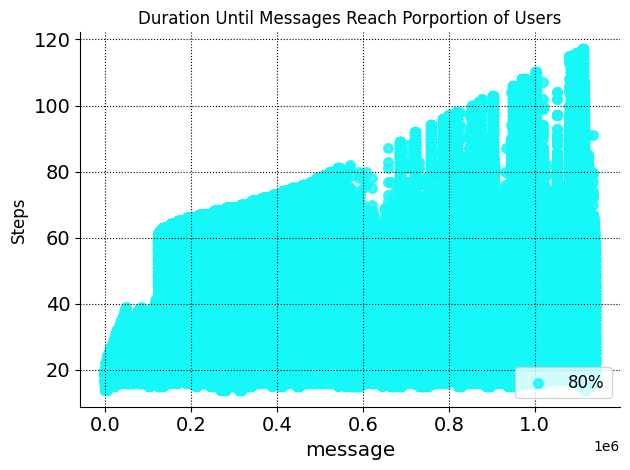

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

to_plot = arr_80th
# to_plot2 = arr_90th
# to_plot3 = arr_full

x_size = len(to_plot)


# cumsum_misinfo = np.cumsum(to_plot)
# cumsum_normal = np.cumsum(to_plot2)


x = np.array(list(range(x_size)))


plt.scatter(x, to_plot, color='#16f7f7', label=r'80%', lw=2, alpha=.8)
# plt.scatter(x, to_plot2, color='#fa9141', label=r'90%', lw=2, alpha=.8)
# plt.scatter(x, to_plot3, color='#a6a6a6', label=r'100%', lw=2, alpha=.8)

ax1.grid(color='black', linestyle='dotted')
ax1.spines[['right', 'top']].set_visible(False)


plt.title('Duration Until Messages Reach Porportion of Users')
plt.xlabel('message', fontsize='x-large')
plt.ylabel('Steps', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

fig.savefig('message_propagation_delays_1' + ".pdf") 
plt.tight_layout()
plt.show()

In [ ]:
mdata = [[8, 33.84197357569164 , 43.93896534017874 , 54.694607711162966],
         [